# Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Open file

In [2]:
# Define the path to the CSV file
file_path = (
    "../data/preprocessed_data.csv"  # Replace with the correct path to your CSV file
)

# Read the CSV file into a DataFrame
preprocessed_data = pd.read_csv(file_path)

# Display the first few rows of the loaded data
print(preprocessed_data.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

# Feature and label

In [3]:
X = preprocessed_data.drop(["id", "Class"], axis=1)  # Features
y = preprocessed_data["Class"]  # Target variable

# Split data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Building (Logistic Regression)

In [5]:
model = LogisticRegression(max_iter=1000)  # You can tune hyperparameters if needed
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

In [6]:
y_pred = model.predict(X_test)

In [7]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9652761901412166


# Classification Report and Confusion Matrix

In [8]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

Confusion Matrix:
 [[55490  1260]
 [ 2689 54287]]


<Figure size 800x600 with 0 Axes>

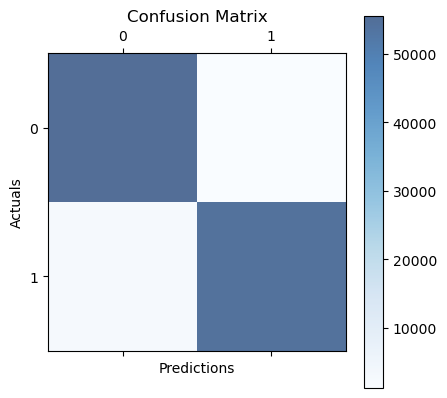

In [9]:
# Visualize the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
plt.xlabel("Predictions")
plt.ylabel("Actuals")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()